# 导入数据处理和算法库包
使用pandas进行数据预处理和分析
使用sklearn中的分类器和评估框架
使用seaborn进行可视化

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import seaborn as sns
%matplotlib inline

# 导入自实现的基本分类器
yqflearn.NativeBayes() 和 yqflearn.KNN()

In [2]:
import yqflearn

# 数据预处理和特征工程

In [3]:
def proccess_dataset(name):
    dataset = pd.read_csv(name, header=None, skipinitialspace=True)
    dataset.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                      'marital-status', 'occupation', 'relationship', 'race',
                      'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
#     for c in ['fnlwgt','hours-per-week']: 
#         dataset = dataset.drop(c, 1)
    dataset['income'] = dataset['income'].str.strip()
    dataset['income'] = dataset['income'].str.strip('.')
    dataset['income'] = dataset['income'].map(lambda x: 0 if x == '<=50K' else 1)

    return dataset

In [4]:
def proccess_train_test(train, test):
    train_y = train[['income']]
    test_y = test[['income']]
    train_test_x = pd.concat([train.ix[:,:'native-country'], test.ix[:,:'native-country']])
    train_test_x = pd.get_dummies(train_test_x)
#     for x in train_test_x.columns:
#         print(x)
    return train_test_x.head(len(train)), train_y, train_test_x.tail(len(test)), test_y

In [5]:
train = proccess_dataset('adult.data.txt')
test = proccess_dataset('adult.test.txt')
train_X, train_y, test_X, test_y = proccess_train_test(train, test)

In [6]:
train_X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,83311,13,0,0,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,215646,9,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,234721,7,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,338409,13,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Columns: 108 entries, age to native-country_Yugoslavia
dtypes: float64(102), int64(6)
memory usage: 27.1 MB


In [8]:
print(len(train_X), len(train_y), len(test_X), len(test_y))

32561 32561 16281 16281


# 评估模型

In [9]:
from sklearn import tree
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors.nearest_centroid import NearestCentroid

In [10]:
def test_model(model):
    print(model)
    train_y_ = train_y.as_matrix().ravel()
    test_y_ = test_y.as_matrix().ravel()
    model.fit(train_X, train_y_)
    pred = model.predict(test_X)
    print('accuracy', accuracy_score(pred, test_y_))

    for class_label in range(len(np.unique(train_y_))):
        print('class', class_label)
        print('precision', precision_score(pred, test_y_, pos_label=class_label))
        print('recall', recall_score(pred, test_y_, pos_label=class_label))
        print('f1', f1_score(pred, test_y_, pos_label=class_label))
    return model

In [11]:
print('train data has class 0 ratio: {}'.format(len(train_y[train_y['income'] == 0]) / len(train_y)))
print('test data has class 0 ratio: {}'.format(len(test_y[test_y['income'] == 0]) / len(test_y)))

train data has class 0 ratio: 0.7591904425539756
test data has class 0 ratio: 0.7637737239727289


In [12]:
test_model(tree.DecisionTreeClassifier())
test_model(NearestCentroid())
test_model(yqflearn.NativeBayes())
test_model(GaussianNB())
test_model(AdaBoostClassifier(n_estimators=100))
test_model(MLPClassifier(hidden_layer_sizes=(20, 10, 10)))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
accuracy 0.811252380075
class 0
precision 0.873180538802
recall 0.878905617614
f1 0.876033724636
class 1
precision 0.611024440978
recall 0.598421186656
f1 0.604657146533
NearestCentroid(metric='euclidean', shrink_threshold=None)
accuracy 0.483999754315
class 0
precision 0.458383594692
recall 0.773825685582
f1 0.575728498561
class 1
precision 0.566822672907
recall 0.244531688166
f1 0.341666013635
NativeBayes()
accuracy 0.783489957619
class 0
precision 0.774266184158
recall 0.930601198531
f1 0.845265791668
class 1
precision 0.813312532501
recall 0.527042965459
f1 0.639607402106
GaussianNB(priors=None)
accuracy 0.795774215343
class 0
precision 0.947567350221
recall 0.815094078583
f1

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [23]:
test_model(yqflearn.KNN(dis_func='euclidean'))
test_model(yqflearn.KNN(dis_func='manhattan'))
test_model(yqflearn.KNN(dis_func='hamming'))
test_model(yqflearn.KNN(dis_func='jaccard'))

test_model(yqflearn.KNN(scale=False))

KNN(dis_func=<sklearn.neighbors.dist_metrics.EuclideanDistance object at 0x7f54ff4c3cf8>)
accuracy 0.79147472514
class 0
precision 0.864656212304
recall 0.862644415918
f1 0.863649142536
class 1
precision 0.554862194488
recall 0.559077809798
f1 0.556962025316
KNN(dis_func=<sklearn.neighbors.dist_metrics.ManhattanDistance object at 0x7f54ff4c3cf8>)
accuracy 0.790676248388
class 0
precision 0.865460394049
recall 0.861166680003
f1 0.863308198299
class 1
precision 0.548881955278
recall 0.557875264271
f1 0.553342070773
KNN(dis_func=<sklearn.neighbors.dist_metrics.HammingDistance object at 0x7f54ff4c3cf8>)
accuracy 0.79233462318
class 0
precision 0.872135102533
recall 0.858262108262
f1 0.865142993897
class 1
precision 0.534321372855
recall 0.56378600823
f1 0.548658390068
KNN(dis_func=<sklearn.neighbors.dist_metrics.JaccardDistance object at 0x7f54ff4c3cf8>)
accuracy 0.786192494319
class 0
precision 0.887092882992
recall 0.841547146781
f1 0.863720001566
class 1
precision 0.459958398336
recall 

KNN(dis_func=<sklearn.neighbors.dist_metrics.EuclideanDistance object at 0x7f54ff4c3cf8>)

In [21]:
test_model(yqflearn.KNN(K=3))
test_model(yqflearn.KNN(K=3, dis_func='hamming'))
test_model(yqflearn.KNN(K=6, dis_func='hamming'))
test_model(yqflearn.KNN(K=9, dis_func='hamming'))

KNN(dis_func=<sklearn.neighbors.dist_metrics.EuclideanDistance object at 0x7f54ff4c3898>)
accuracy 0.816780296051
class 0
precision 0.89545637314
recall 0.868700265252
f1 0.881875420742
class 1
precision 0.5624024961
recall 0.624602945423
f1 0.591873033247
KNN(dis_func=<sklearn.neighbors.dist_metrics.HammingDistance object at 0x7f54ff4c3898>)
accuracy 0.812050856827
class 0
precision 0.898994772819
recall 0.861049064161
f1 0.879612872767
class 1
precision 0.53094123765
recall 0.619163129169
f1 0.571668533035
KNN(dis_func=<sklearn.neighbors.dist_metrics.HammingDistance object at 0x7f54ff4c3898>)
accuracy 0.822185369449
class 0
precision 0.938882187374
recall 0.845401882694
f1 0.88969327491
class 1
precision 0.444877795112
recall 0.692432213679
f1 0.541712838373
KNN(dis_func=<sklearn.neighbors.dist_metrics.HammingDistance object at 0x7f54ff4c3898>)
accuracy 0.827836128002
class 0
precision 0.920144752714
recall 0.863416842741
f1 0.890878654572
class 1
precision 0.529381175247
recall 0.67

KNN(dis_func=<sklearn.neighbors.dist_metrics.HammingDistance object at 0x7f54ff4c3898>)

In [22]:
test_model(yqflearn.KNN(K=12, dis_func='hamming'))

KNN(dis_func=<sklearn.neighbors.dist_metrics.HammingDistance object at 0x7f54ff4c37b8>)
accuracy 0.827897549291
class 0
precision 0.935182951347
recall 0.853504587156
f1 0.892478894858
class 1
precision 0.48101924077
recall 0.696536144578
f1 0.569055675177


KNN(dis_func=<sklearn.neighbors.dist_metrics.HammingDistance object at 0x7f54ff4c37b8>)

In [14]:
import xgboost as xgb

dtrain = xgb.DMatrix(train_X, train_y)
dvalid = xgb.DMatrix(test_X, test_y)

print("# Num of Features: ", train_X.shape[1])

params = {
    "objective": "binary:logistic",
    "booster": "gbtree",
    "eta": 0.25,
}

gbm = xgb.train(params, dtrain, 40)

ypred_bst = gbm.predict(xgb.DMatrix(test_X))
print(accuracy_score((ypred_bst > 0.5).astype(int), test_y))

/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Num of Features:  108
0.878078742092


In [15]:
for class_label in range(len(np.unique(test_y))):
    print('class', class_label)
    print('precision', precision_score((ypred_bst > 0.5).astype(int), test_y, pos_label=class_label))
    print('recall', recall_score((ypred_bst > 0.5).astype(int), test_y, pos_label=class_label))
    print('f1', f1_score((ypred_bst > 0.5).astype(int), test_y, pos_label=class_label))

class 0
precision 0.947567350221
recall 0.898368405002
f1 0.922312238269
class 1
precision 0.653406136245
recall 0.793996840442
f1 0.716873484524


0.928100025489


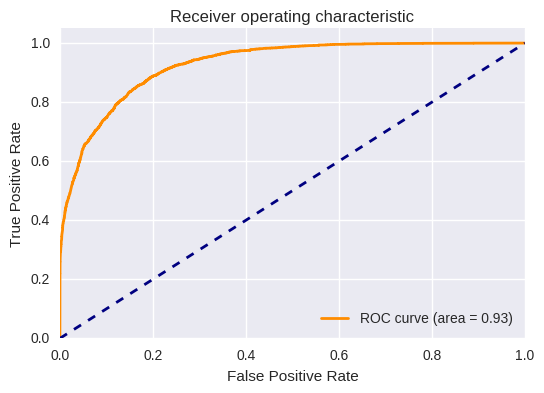

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = metrics.roc_curve(test_y.as_matrix(), ypred_bst)
print(metrics.auc(fpr, tpr))

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

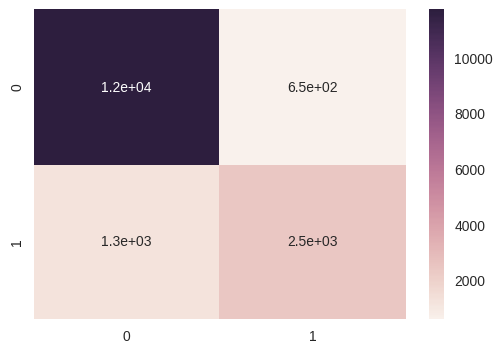

In [17]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y['income'], (ypred_bst > 0.5).astype(int))
np.set_printoptions(precision=2)

df_cm = pd.DataFrame(cnf_matrix, index = [str(x) for x in range(0, 2)],
                  columns = [str(x) for x in range(0, 2)])
sns.heatmap(df_cm, annot=True)

In [18]:
ypred_bst

array([ 0.  ,  0.17,  0.41, ...,  0.77,  0.04,  0.76], dtype=float32)

## 测试Keras神经网络库

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.layers.advanced_activations import PReLU

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(100, input_dim=train_X.shape[1], init='normal', activation='relu'))
    model.add(PReLU())
    model.add(Dropout(0.5))
    model.add(Dense(100, input_dim=train_X.shape[1], init='normal', activation='relu'))
    model.add(PReLU())
    model.add(Dropout(0.5))
    model.add(Dense(100, input_dim=train_X.shape[1], init='normal', activation='relu'))
#     model.add(PReLU())
    model.add(Dropout(0.5))
    model.add(Dense(20, input_dim=train_X.shape[1], init='normal', activation='relu'))
#     model.add(PReLU())
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])  #logloss
    return model

model = baseline_model()
model.fit(train_X.as_matrix(), train_y.as_matrix(), nb_epoch=10, batch_size=1000)


Using TensorFlow backend.


Epoch 1/10
32561/32561 [==============================] - 1s - loss: 4.1868 - acc: 0.7384     
Epoch 2/10
32561/32561 [==============================] - 1s - loss: 3.9204 - acc: 0.7563     
Epoch 3/10
32561/32561 [==============================] - 1s - loss: 3.8966 - acc: 0.7578     
Epoch 4/10
32561/32561 [==============================] - 1s - loss: 3.8852 - acc: 0.7584     
Epoch 5/10
32561/32561 [==============================] - 1s - loss: 3.8855 - acc: 0.7585     
Epoch 6/10
32561/32561 [==============================] - 1s - loss: 3.8870 - acc: 0.7585     
Epoch 7/10
32561/32561 [==============================] - 1s - loss: 3.8898 - acc: 0.7584     
Epoch 8/10
32561/32561 [==============================] - 1s - loss: 3.8790 - acc: 0.7590     
Epoch 9/10
32561/32561 [==============================] - 1s - loss: 3.8910 - acc: 0.7582     
Epoch 10/10
32561/32561 [==============================] - 1s - loss: 3.8836 - acc: 0.7587     


In [20]:
sc = model.evaluate(test_X.as_matrix(), test_y.as_matrix(), batch_size=2000)
# model.predict_on_batch(test_X.as_matrix())
sc

16000/16281 [============================>.] - ETA: 0s

[3.8075128808287189, 0.76377372953011802]